In [4]:
import numpy as np
import json
from pprint import pprint
import matplotlib.pyplot as plt
import matplotlib
from collections import defaultdict

plt.rcParams['figure.figsize'] = [16, 4]
from plot_utils import *

In [41]:
def plot_one_pval_TE_final(ax,run_list,main_enum,fname_pattern,pval_list,pvalt1,debug_tidx,rr_lambda,tmle_lambda,l2_lambda):
    #Getting the metrics
    result_dict = get_all_result_dict(
                            run_list=run_list,
                            pval_list=pval_list,
                            enum=main_enum,
                            fname_pattern=fname_pattern.format(
                                                        "{1}",
                                                        "{0}",
                                                        pvalt1,
                                                        debug_tidx,
                                                        rr_lambda,
                                                        tmle_lambda,
                                                        l2_lambda,
                            )

    )
    
    #Plotting the result
    for pidx,plot_item in enumerate(plot_item_list):
        #Plotting the results
        item_yval = [result_dict[pval][plot_item]["mean"] for pval in pval_list]
        yerr=[0.0]*len(item_yval)
        #Plotting the item
        ax[pidx].errorbar(pval_list,item_yval,yerr,label="topic={}".format(debug_tidx),ls="-.",marker="o",alpha=0.7)
        
        
        ax[pidx].set_xlabel("predictive-correlation")
        ax[pidx].set_ylabel(plot_item)
        
        ax[pidx].legend()
        ax[pidx].grid(True)

In [51]:
def plot_one_pval_TE_timeline(ax,run_list,main_enum,fname_pattern,pval_list,pvalt1,debug_tidx,rr_lambda,tmle_lambda,l2_lambda):
    #Getting the metrics
    result_dict_timeline = get_all_result_timeline(
                                run_list=run_list,
                                pval_list=pval_list,
                                fname_pattern=fname_pattern.format(
                                                            "{1}",
                                                            "{0}",
                                                            pvalt1,
                                                            debug_tidx,
                                                            rr_lambda,
                                                            tmle_lambda,
                                                            l2_lambda,
                                )

    )
    for pidx,plot_item in enumerate(plot_item_list):
        for pval in pval_list:
            #Getting the timeline item
            item_pval_yval_timeline = result_dict_timeline[pval][plot_item]["mean"]
            yerr=[0.0]*len(item_pval_yval_timeline)
            xval = range(len(item_pval_yval_timeline))

            #Plotting the item
            ax[pidx,debug_tidx].errorbar(xval,item_pval_yval_timeline,yerr,label="pval={}".format(pval),ls="-.",marker="o",alpha=0.7)
            #ax[pidx,anidx].fill_between(pval_list,ylb,yub,alpha=0.2)




            ax[pidx,debug_tidx].set_xlabel("epoch")
            ax[pidx,debug_tidx].set_ylabel(plot_item)

            ax[pidx,debug_tidx].legend()
            ax[pidx,debug_tidx].grid(True)

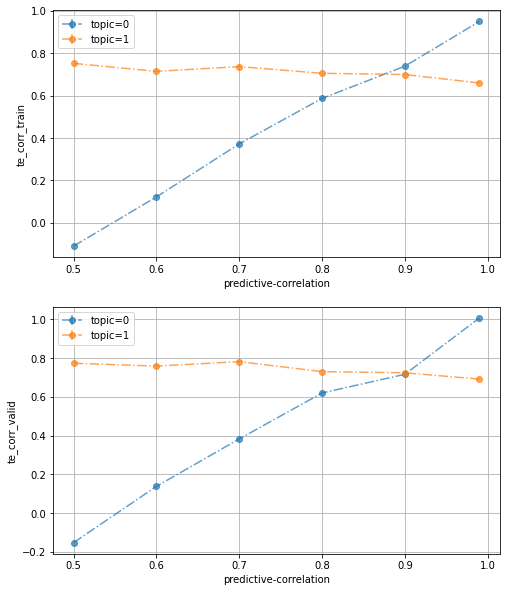

In [58]:
run_list=[1,]
main_enum=12

rr_lambda=1
tmle_lambda=1
l2_lambda=1
debug_tidx_list=[0,1]

pvalt1=0.9
pvalt0_list=[0.5,0.6,0.7,0.8,0.9,0.99]


plot_item_list=[
#             "te_train",
            "te_corr_train",
#             "te_valid",
            "te_corr_valid",
#             "rr_loss",
#             "reg_loss",
#             "tmle_loss",
#             "l2_loss",
]


plt.rcParams['figure.figsize'] = [8, 5*len(plot_item_list)]
fig,ax = plt.subplots(len(plot_item_list),1)

for debug_tidx in debug_tidx_list:
    fname_pattern= "dataset/nlp_toy2/nlp_logs/cad.s1riesz.rnum({}).pvalt0({}).pvalt1({}).dtidx({}).rr_lmd({}).tmle_lmd({}).l2_lmd({})/probe_metric_list.json"
    plot_one_pval_TE_final(ax=ax,
                           run_list=run_list,
                           main_enum=main_enum,
                           fname_pattern=fname_pattern,
                           pval_list=pvalt0_list,
                           pvalt1=pvalt1,
                           debug_tidx=debug_tidx,
                           rr_lambda=rr_lambda,
                           tmle_lambda=tmle_lambda,
                           l2_lambda=l2_lambda
    )

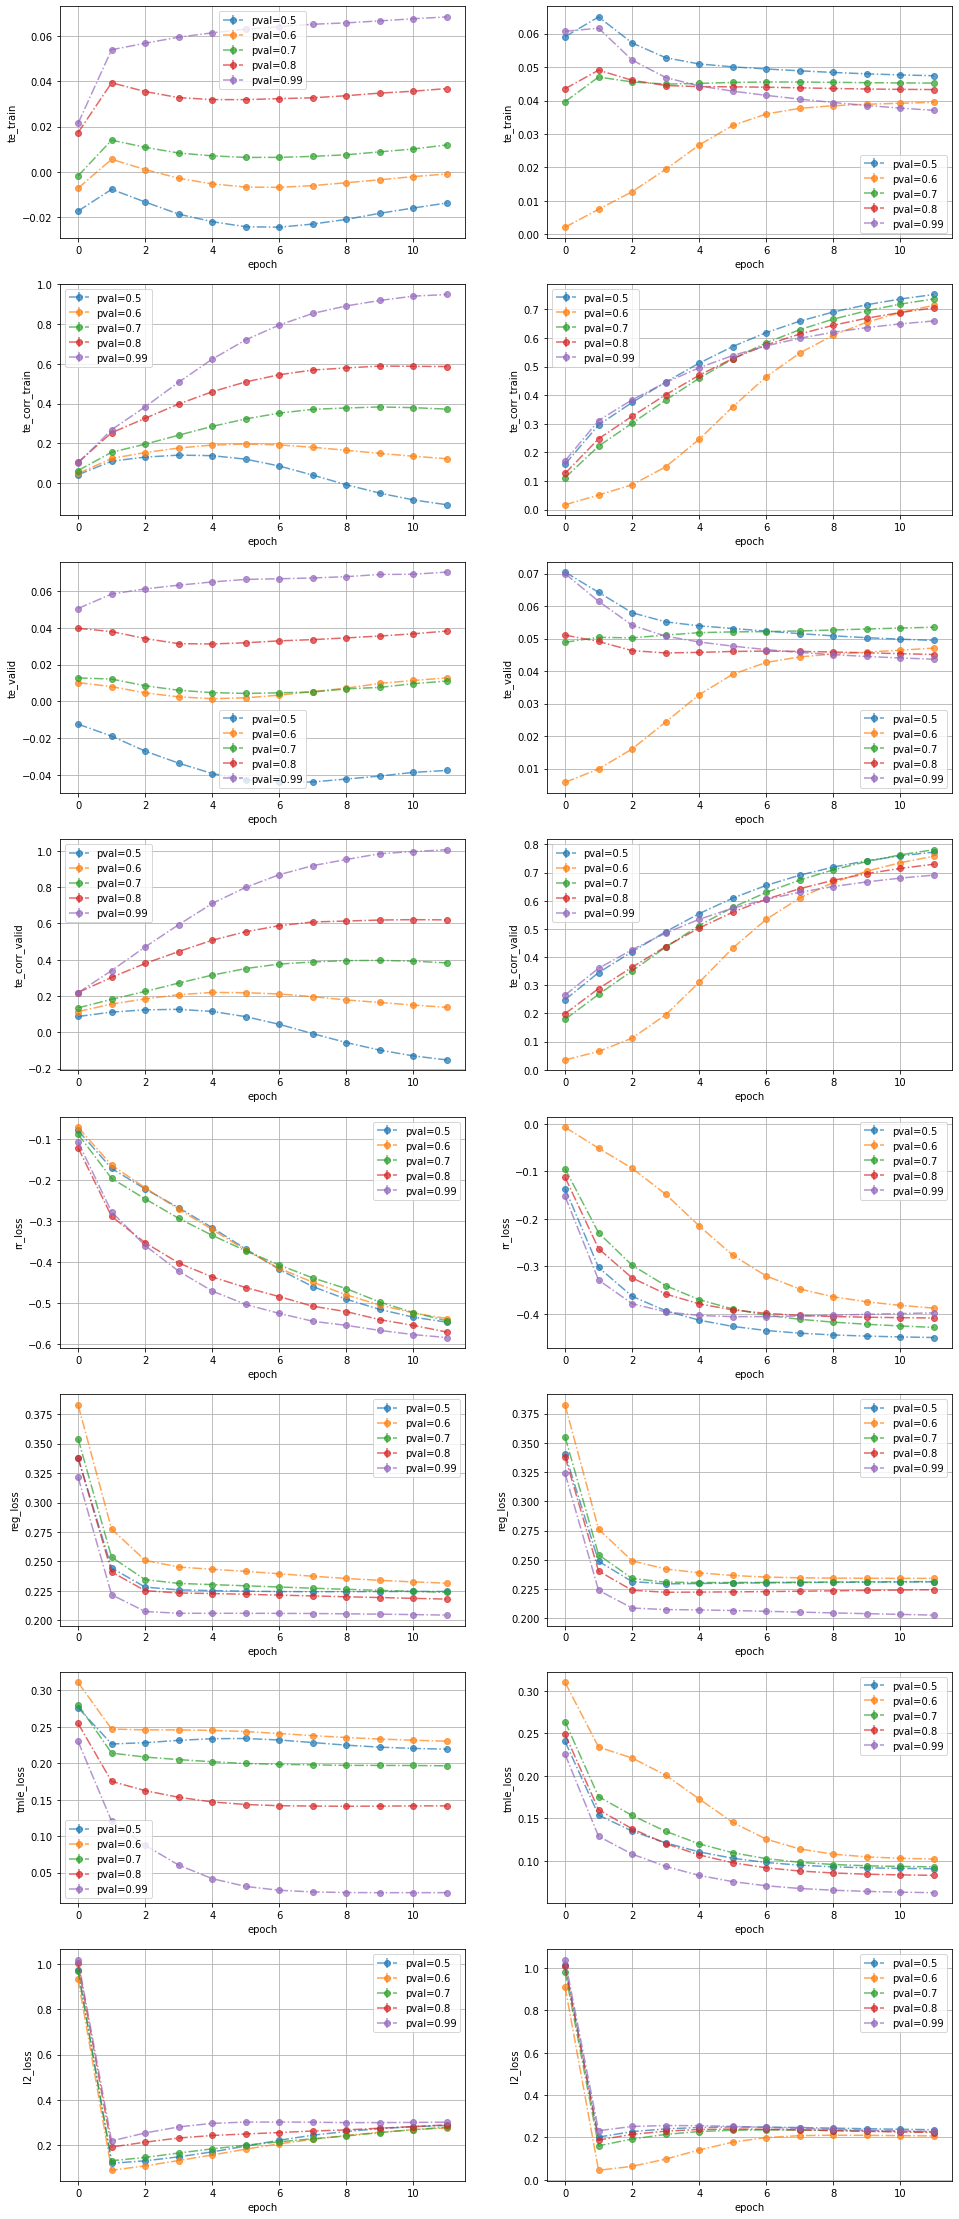

In [54]:
run_list=[1,]
main_enum=12

rr_lambda=1
tmle_lambda=1
l2_lambda=1
debug_tidx_list=[0,1]

pvalt1=0.9
pvalt0_list=[0.5,0.6,0.7,0.8,0.99]


plot_item_list=[
            "te_train",
            "te_corr_train",
            "te_valid",
            "te_corr_valid",
            "rr_loss",
            "reg_loss",
            "tmle_loss",
            "l2_loss",
]


plt.rcParams['figure.figsize'] = [16, 5*len(plot_item_list)]
fig,ax = plt.subplots(len(plot_item_list),len(debug_tidx_list))

for debug_tidx in debug_tidx_list:
    fname_pattern= "dataset/nlp_toy2/nlp_logs/cad.s1riesz.rnum({}).pvalt0({}).pvalt1({}).dtidx({}).rr_lmd({}).tmle_lmd({}).l2_lmd({})/probe_metric_list.json"
    plot_one_pval_TE_timeline(ax=ax,
                           run_list=run_list,
                           main_enum=main_enum,
                           fname_pattern=fname_pattern,
                           pval_list=pvalt0_list,
                           pvalt1=pvalt1,
                           debug_tidx=debug_tidx,
                           rr_lambda=rr_lambda,
                           tmle_lambda=tmle_lambda,
                           l2_lambda=l2_lambda
    )